# **Project: Credit Card Spend Analysis & Forecasting**

## **Introduction**
Credit card transactions generate vast amounts of data, providing valuable insights into
customer spending patterns. Financial institutions and businesses can leverage this data to
forecast future spending trends, optimize marketing strategies, and enhance customer
experience.
- This project aims to analyze customer spending behavior based on transaction categories (e.g.,
food, travel, shopping) and build a time-series forecasting model (Facebook Prophet) to
predict future spending trends.
- The model will be deployed as a Streamlit web app, allowing
users to input parameters and get spending forecasts.

## **Problem Definition**

Financial institutions and businesses often struggle to:

● Identify spending trends among customers across various categories.

● Predict future spending behavior to improve budgeting and marketing strategies.

● Personalize financial services such as credit limits and cashback offers.

## **Dataset Description**

- https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset

___

# **Exploratory Data Analysis (EDA)**

___

## **Basic EDA Questions (Beginner-Level)**

## **1.Top Spending Categories by Transaction Volume and Amount**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
df = pd.read_csv('/content/credit_card_transactions.csv')

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [5]:
# Top categories by transaction volume
top_categories_volume = df['category'].value_counts().head(10)
print("Top Categories by Transaction Volume:\n", top_categories_volume)

# Top categories by total transaction amount
top_categories_amount = df.groupby('category')['amt'].sum().sort_values(ascending=False).head(10)
print("\nTop Categories by Transaction Amount:\n", top_categories_amount)


Top Categories by Transaction Volume:
 category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
Name: count, dtype: int64

Top Categories by Transaction Amount:
 category
grocery_pos      14460822.38
shopping_pos      9307993.61
shopping_net      8625149.68
gas_transport     8351732.29
home              7173928.11
kids_pets         6503680.16
entertainment     6036678.56
misc_net          5117709.26
misc_pos          5009582.50
food_dining       4672459.44
Name: amt, dtype: float64


---

# **2. Spending Variation Over Time (Daily, Weekly, Monthly Trends)**

In [6]:
# Converting transaction date to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')


In [7]:
# Extracting day, week, and month from the timestamp
df['day'] = df['trans_date_trans_time'].dt.date
df['week'] = df['trans_date_trans_time'].dt.isocalendar().week
df['month'] = df['trans_date_trans_time'].dt.month

In [8]:
# Daily spending trend
daily_trend = df.groupby('day')['amt'].sum()

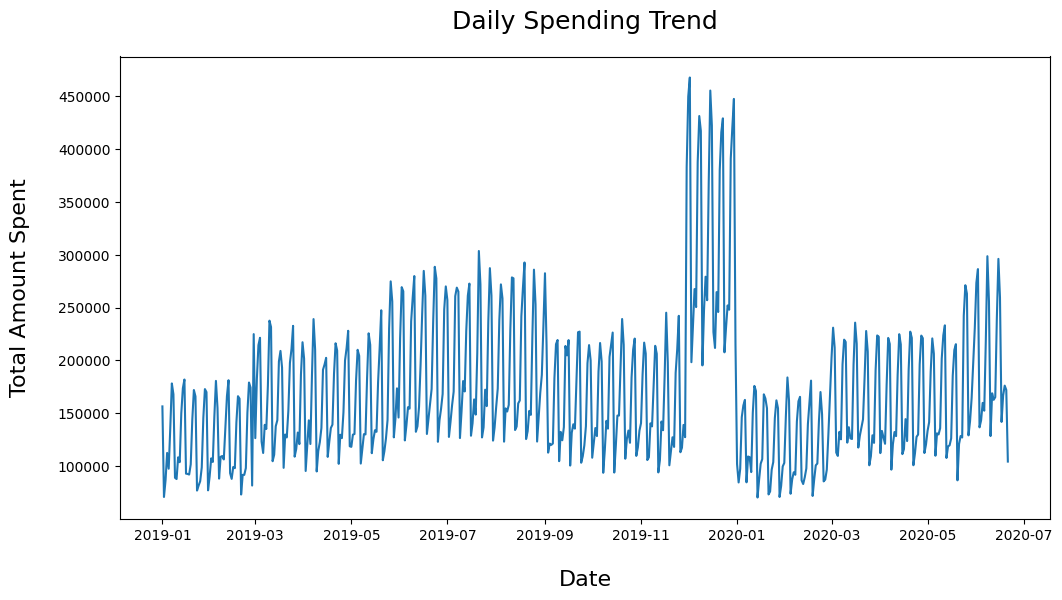

In [9]:
# Plotting daily trend

plt.figure(figsize=(12, 6))
daily_trend.plot()
plt.title('Daily Spending Trend',pad=20,size=18)
plt.xlabel('Date',labelpad=20, fontdict={'size': 16})
plt.ylabel('Total Amount Spent',labelpad=20,fontdict={'size':16})

plt.savefig("Daily Spending Trend.png", dpi=300, bbox_inches="tight")
plt.show()

# INSIGHTS

- Gradual Growth with Cyclical Patterns (Jan 2019 - Oct 2019)

Spending shows a clear cyclical pattern with regular peaks and troughs, indicating consistent weekly or bi-weekly spending habits.There is a noticeable upward trend, with peak spending growing from around 150,000 units in January 2019 to approximately 300,000 units by mid-2019.

- Sharp Spending Spike in Late 2019

Between November and December 2019, spending surged significantly, with peaks exceeding 450,000 units—about a 50% increase from the previous high.
This spike likely reflects seasonal factors such as holiday shopping seasons or major sales events like Black Friday.

- Sudden Drop and Recovery in Early 2020

Starting January 2020, spending dropped sharply to below 100,000 units, possibly due to post-holiday financial slowdowns or the early impacts of COVID-19.From March 2020 onward, spending gradually recovered, stabilizing between 150,000 and 250,000 units per day, indicating a return to more typical consumer behavior.

---

In [10]:
# Weekly trends
weekly_trend = df.groupby('week')['amt'].sum()


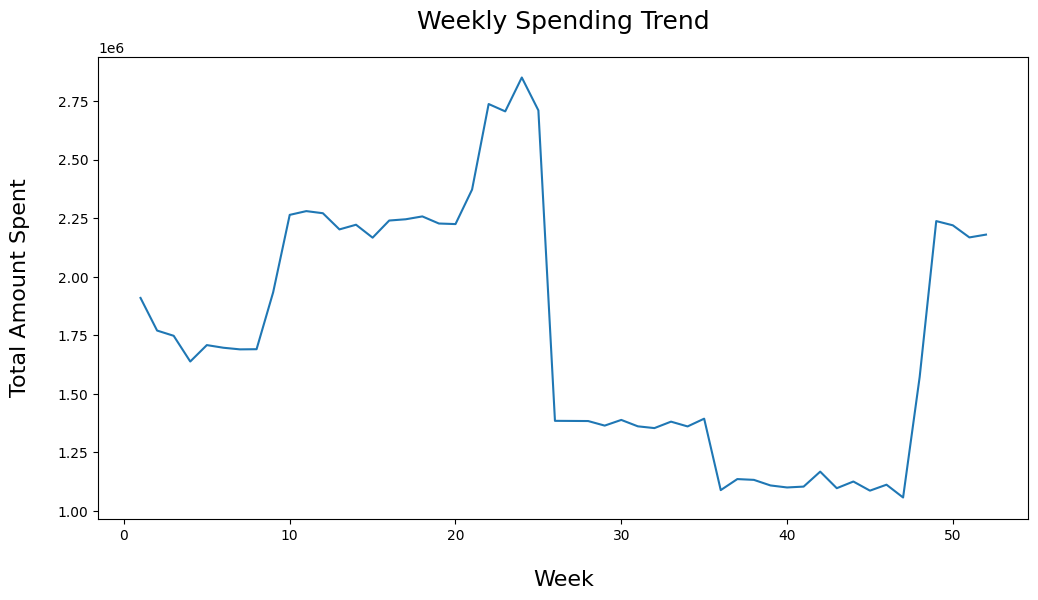

In [11]:
# Plotting weekly trend
plt.figure(figsize=(12, 6))
weekly_trend.plot()
plt.title('Weekly Spending Trend',pad=20,size=18)
plt.xlabel('Week',labelpad=20, fontdict={'size': 16})
plt.ylabel('Total Amount Spent',labelpad=20 ,fontdict={'size': 16})

plt.savefig("Weekly Spending Trend.png", dpi=300, bbox_inches="tight")
plt.show()

## INSIGHTS

- Initial Fluctuation and Gradual Growth (Weeks 1–20)

Spending starts at approximately 1.9 million units in the early weeks but dips slightly to around 1.7 million units by week 5.
A steady growth pattern follows, with weekly spending increasing to nearly 2.3 million units by week 20, indicating consistent spending growth possibly driven by seasonal trends or economic factors.

- Significant Spending Peak and Sudden Drop (Weeks 21–26)

A sharp spike occurs around week 24, with spending peaking close to 2.8 million units—an increase of over 20% from earlier weeks.This surge is followed by a steep drop in spending, falling to about 1.4 million units by week 27, potentially reflecting the end of a promotional period or a significant market event.

- Prolonged Decline and Late-Year Recovery (Weeks 27–52)
Spending remains consistently low between weeks 27 and 45, averaging around 1.2 million units, indicating possible economic downturns or consumer caution.
A noticeable rebound begins after week 45, with spending climbing back to around 2.2 million units by the end of the year, possibly due to holiday shopping or year-end spending patterns.


---
---

In [12]:
monthly_trend = df.groupby('month')['amt'].sum()

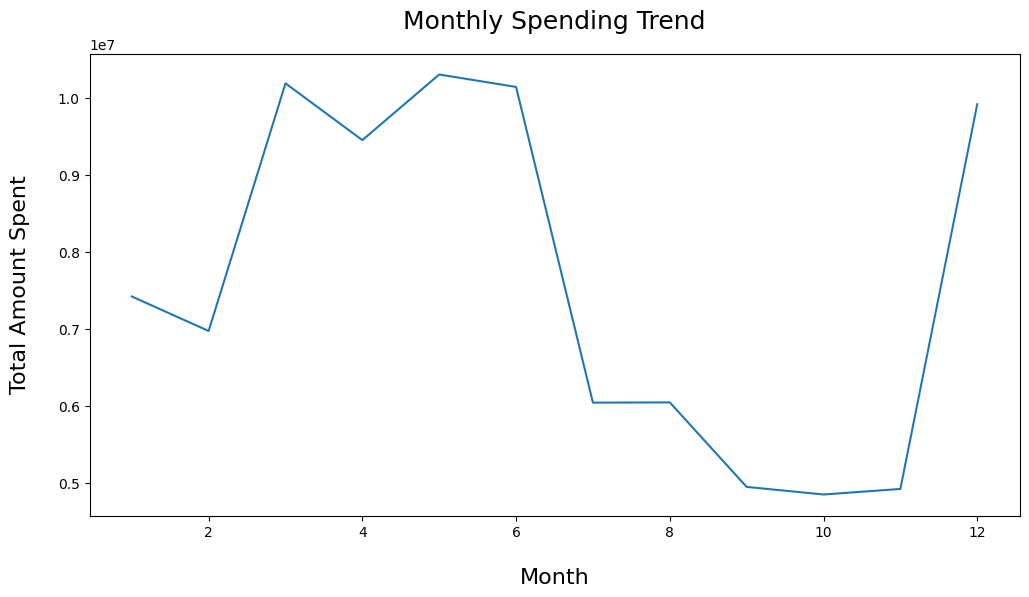

In [13]:
# Plotting monthly trend
plt.figure(figsize=(12, 6))
monthly_trend.plot()
plt.title('Monthly Spending Trend',pad=18,size=18)
plt.xlabel('Month',labelpad=20, fontdict={'size': 16})
plt.ylabel('Total Amount Spent',labelpad=20,fontdict={'size':16})

plt.savefig("Monthy Spending Trend.png", dpi=300, bbox_inches="tight")
plt.show()

# INSIGHTS
- Early-Year Growth and Spending Peak (January–June)

Spending starts at approximately 7.4 million units in January and dips slightly to around 7 million units in February.
A significant surge follows, with spending peaking at over 10.5 million units in both May and June, reflecting a substantial increase of more than 50% from February levels. This spike may be tied to seasonal events or mid-year financial cycles.

- Sharp Decline in Mid-Year Spending (July–October)

A drastic drop occurs from July onward, where spending falls from over 10 million units to around 6 million units—a nearly 40% decrease.By October, spending reaches its lowest point at roughly 4.8 million units, likely indicating reduced consumer activity, economic downturn, or seasonal spending slowdown.

- Year-End Recovery (November–December)

After hitting the low, spending starts to recover, with a sharp increase in December back to around 9.9 million units, reflecting a 100% growth from October.
This significant uptick could be attributed to holiday season spending, year-end bonuses, or festive shopping trends.

---

---

## **3. Peak Spending Hours in a Day**

<ipython-input-14-3025d7eae3dc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_spending.index, y=hourly_spending.values, palette="coolwarm")


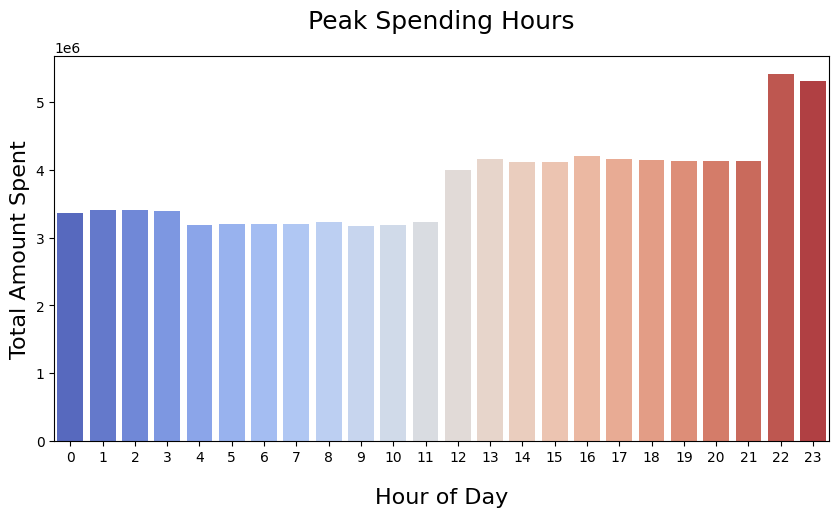

In [14]:
# Extract hour from timestamp
df['hour'] = df['trans_date_trans_time'].dt.hour

# Spending by hour
hourly_spending = df.groupby('hour')['amt'].sum()

# Plotting
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_spending.index, y=hourly_spending.values, palette="coolwarm")
plt.title('Peak Spending Hours',pad=20,size=18)
plt.xlabel('Hour of Day',labelpad=16,fontdict={'size': 16})
plt.ylabel('Total Amount Spent',fontdict={'size': 16})
plt.show()


## INSIGHTS

- Stable Early-Day Spending (12 AM – 12 PM)

Spending remains relatively consistent from midnight to noon, fluctuating between 3.2 to 3.4 million units.
There is a slight dip between 4 AM and 11 AM, likely reflecting reduced consumer activity during early morning hours.

- Significant Evening Surge (12 PM – 11 PM)

Spending starts to rise noticeably from 12 PM onward, peaking dramatically between 10 PM and 11 PM at over 5.4 million units.
This late-evening surge suggests that consumers are most active during the night, possibly due to leisure time, online shopping, or post-work hours.

---

## **4.Merchants with the Highest Transactions**

In [15]:
# Merchants by transaction count
top_merchants = df['merchant'].value_counts().head(10)
print("Top Merchants by Transaction Count:\n", top_merchants)

# Merchants by transaction amount
top_merchants_amount = df.groupby('merchant')['amt'].sum().sort_values(ascending=False).head(10)
print("\nTop Merchants by Total Transaction Amount:\n", top_merchants_amount)


Top Merchants by Transaction Count:
 merchant
fraud_Kilback LLC                   4403
fraud_Cormier LLC                   3649
fraud_Schumm PLC                    3634
fraud_Kuhn LLC                      3510
fraud_Boyer PLC                     3493
fraud_Dickinson Ltd                 3434
fraud_Cummerata-Jones               2736
fraud_Kutch LLC                     2734
fraud_Olson, Becker and Koch        2723
fraud_Stroman, Hudson and Erdman    2721
Name: count, dtype: int64

Top Merchants by Total Transaction Amount:
 merchant
fraud_Kilback LLC                   391078.15
fraud_Bradtke PLC                   302481.25
fraud_Doyle Ltd                     300971.37
fraud_Hackett-Lueilwitz             300208.14
fraud_Schumm, Bauch and Ondricka    299115.14
fraud_Rau and Sons                  298354.77
fraud_Goodwin-Nitzsche              298083.31
fraud_Pacocha-O'Reilly              297584.38
fraud_Murray-Smitham                296982.73
fraud_Bauch-Raynor                  295721.20
Name

---
# **Intermediate EDA Questions**

## **1.Seasonal trends in spending across different categories?**

In [16]:
# Extracting month and season from the date

df['month'] = df['trans_date_trans_time'].dt.month
df['season'] = df['month'] % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall



In [17]:
# Average spending per season for each category
seasonal_trends = df.groupby(['season', 'category'])['amt'].mean().unstack()

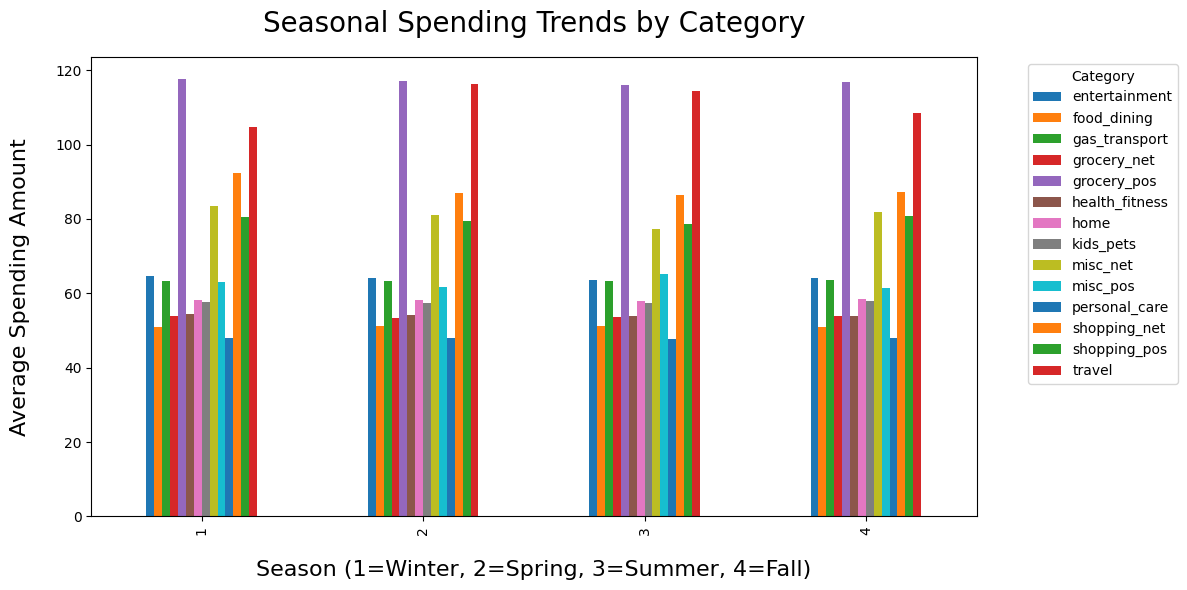

In [18]:
# Plot seasonal spending trends
seasonal_trends.plot(kind='bar', figsize=(12, 6))
plt.title('Seasonal Spending Trends by Category',size=20,pad=18)
plt.xlabel('Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)',labelpad=18,fontdict={'size': 16})
plt.ylabel('Average Spending Amount',labelpad=18,fontdict={'size': 16})
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("Seasonal Spending Trends by Category", dpi=300, bbox_inches="tight")
plt.show()

# INSIGHTS

- Highest Spending Categories

Travel and grocery_pos consistently show the highest spending across all seasons, peaking around 115–117 units.
Shopping_net and shopping_pos also see notable spending, especially during Winter and Fall, likely due to holiday shopping and seasonal promotions.

- Seasonal Variations

Spending on travel peaks in Spring and Summer, aligning with vacation trends.
Categories like food_dining and entertainment remain steady but slightly increase during Winter, possibly due to holiday gatherings and events.

---

## **Behaviour of Different Customer Segments (High Spenders vs. Low Spenders)**

In [19]:
# Total spending by each customer
customer_spending = df.groupby('cc_num')['amt'].sum()


In [20]:
# Define high and low spenders based on the median
median_spend = customer_spending.median()
df['spending_segment'] = df['cc_num'].map(lambda x: 'High Spender' if customer_spending[x] > median_spend else 'Low Spender')

In [21]:
# Compare spending behavior across categories
segment_behavior = df.groupby(['spending_segment', 'category'])['amt'].mean().unstack()

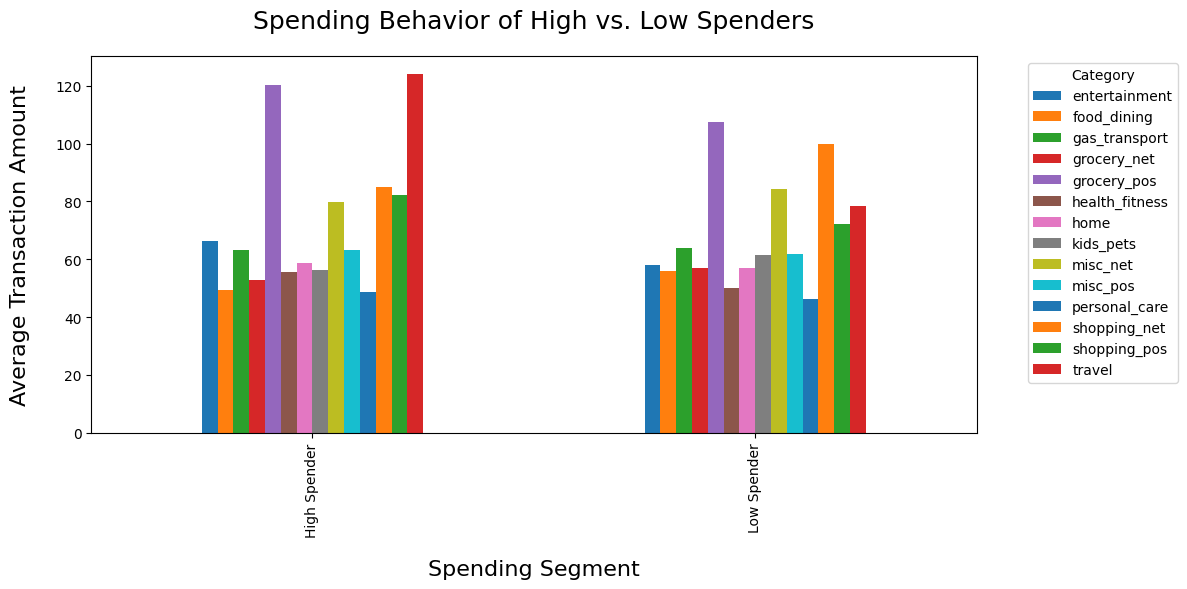

In [23]:
# Visualize
segment_behavior.plot(kind='bar', figsize=(12, 6))
plt.title('Spending Behavior of High vs. Low Spenders', pad=20, fontsize=18) # Changed 'label' to 'fontsize'
plt.xlabel('Spending Segment',labelpad=16,fontdict={'size': 16})
plt.ylabel('Average Transaction Amount',labelpad=18,fontdict={'size': 16})
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Replace spaces in the filename with underscores or a different delimiter
plt.savefig("Spending_Behavior_of_High_vs_Low_Spenders.png", dpi=300, bbox_inches="tight")
plt.show()

## INSIGHTS

- High Spenders' Preferences

High spenders allocate the most to travel and grocery_pos, with average transaction amounts exceeding 120 units.
Categories like shopping_net and shopping_pos also see significant spending, highlighting a preference for shopping and leisure-related activities.

- Low Spenders' Focus

Low spenders show a more balanced distribution, with food_dining and misc_net standing out as the top categories.
Travel and grocery_pos spending decreases noticeably among low spenders, indicating these are more discretionary for this group.

---

## **3.Distribution of transaction amounts (e.g., histogram, boxplot analysis)?**



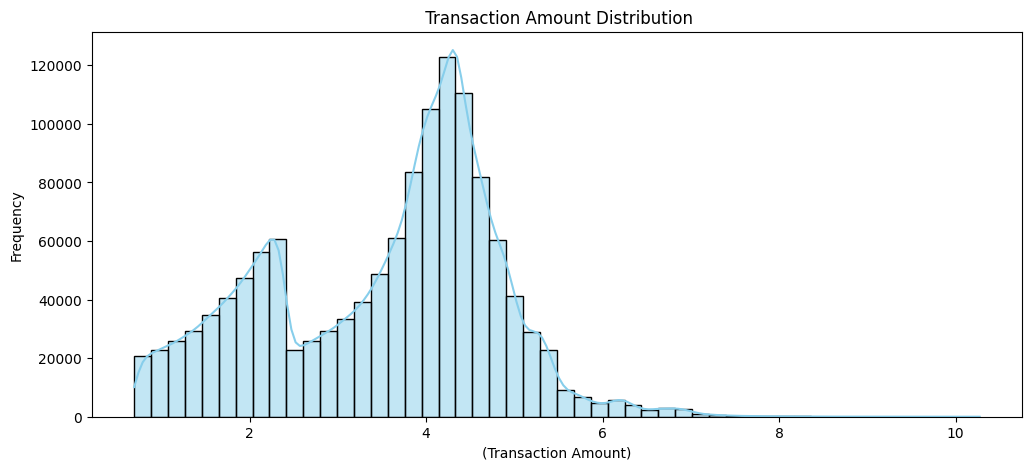

In [24]:
# Histogram with log transformation
plt.figure(figsize=(12, 5))
sns.histplot(np.log1p(df['amt']), bins=50, kde=True, color='skyblue')
plt.title(' Transaction Amount Distribution')
plt.xlabel('(Transaction Amount)')
plt.ylabel('Frequency')

plt.savefig("Transaction Amount Distribution_Histogram", dpi=300, bbox_inches="tight")
plt.show()


## INSIGHTS

- Bimodal Distribution Pattern

The histogram reveals a bimodal distribution with two distinct peaks:
The first peak occurs around 2.2 units, indicating a high frequency of small transactions, likely representing everyday purchases or microtransactions.
The second, larger peak centers around 4.3 units, suggesting a common spending range for moderate transactions like groceries or dining.

- Skewness and Outliers

The distribution is right-skewed, with a long tail extending beyond 6 units, reflecting occasional high-value transactions.
Few transactions surpass 8 units, highlighting that large expenditures are rare within this dataset.

- Transaction Frequency Insight

The highest frequency of transactions is concentrated between 4.0 and 4.5 units, implying that this range represents typical spending behavior for the majority of customers.

---
---

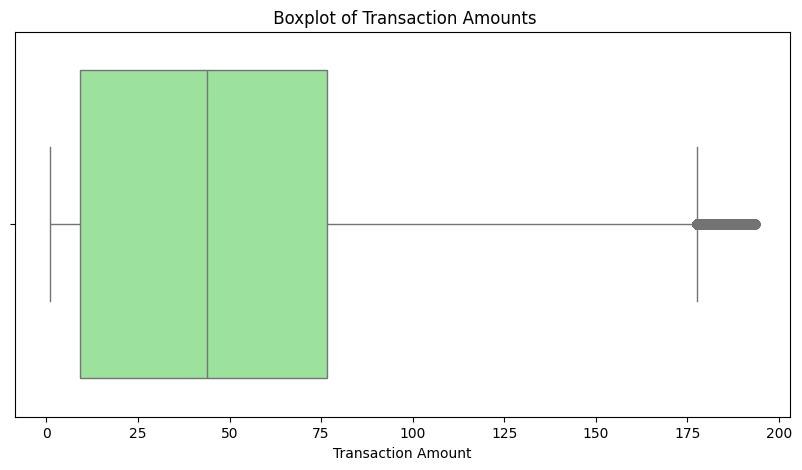

In [25]:
# Removing outliers using IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['amt'] >= Q1 - 1.5 * IQR) & (df['amt'] <= Q3 + 1.5 * IQR)]

# Boxplot without outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_df['amt'], color='lightgreen')
plt.title(' Boxplot of Transaction Amounts')
plt.xlabel('Transaction Amount')

plt.savefig(" Boxplot of Transaction Amounts", dpi=300, bbox_inches="tight")
plt.show()


## Observation:
The boxplot displays a median transaction amount around 50, with the interquartile range (IQR) spanning from approximately 0 to 100. Outliers are visible beyond 175.

## Insight:
The data has a considerable number of high-value outliers, which suggests that while most transactions are moderate, a few large transactions could skew the overall spending metrics.

---


## **4.Correlations between spending behavior and location?**

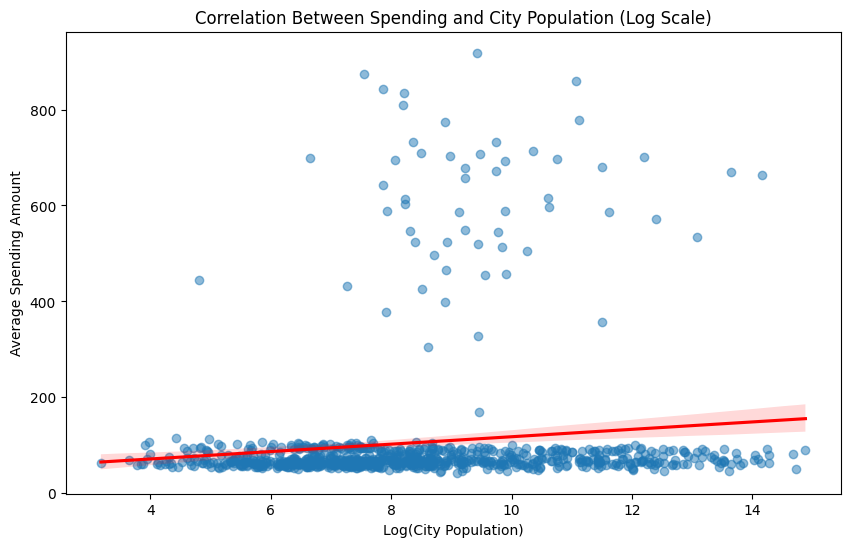

Correlation Matrix:
           city_pop       amt
city_pop  1.000000  0.005818
amt       0.005818  1.000000


In [26]:
# Group spending by city population and apply log transformation
location_correlation = df.groupby('city_pop')['amt'].mean().reset_index()
location_correlation['log_city_pop'] = np.log1p(location_correlation['city_pop'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='log_city_pop', y='amt', data=location_correlation, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Correlation Between Spending and City Population (Log Scale)')
plt.xlabel('Log(City Population)')
plt.ylabel('Average Spending Amount')
plt.savefig("Correlation Between Spending and City Population (Log Scale)", dpi=300, bbox_inches="tight")
plt.show()

# Correlation coefficient
correlation = df[['city_pop', 'amt']].corr()
print("Correlation Matrix:\n", correlation)


## INSIGHTS

- Positive Correlation: There is a weak but clear positive relationship—average spending increases as city population (log scale) grows.

- High-Spending Outliers: Significant outliers appear between log population values of 8 to 12, where spending exceeds 600 units, likely driven by wealthier urban areas or higher living costs.

- Spending Plateau: Beyond a log population of 12, spending levels off, suggesting factors like income distribution or cost of living may influence spending more than population size at this scale.

---

## **5. Change of spending behavior before and after payday?**

Assuming payday is on the 1st and 15th of each month

<ipython-input-27-8e9763b4e6bd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payday_spending.index, y=payday_spending.values, palette='Set2')


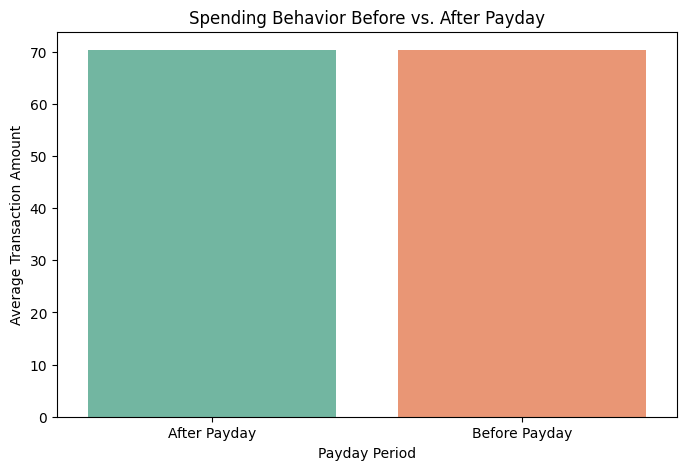

In [27]:
# Correcting payday classification
def classify_payday(date):
    day = pd.to_datetime(date).day
    if day <= 7 or (15 <= day <= 21):  # First week after payday
        return 'After Payday'
    else:
        return 'Before Payday'

df['payday_period'] = df['trans_date_trans_time'].apply(classify_payday)

# Average spending before vs. after payday
payday_spending = df.groupby('payday_period')['amt'].mean()

# Visualizing
plt.figure(figsize=(8, 5))
sns.barplot(x=payday_spending.index, y=payday_spending.values, palette='Set2')
plt.title('Spending Behavior Before vs. After Payday')
plt.xlabel('Payday Period')
plt.ylabel('Average Transaction Amount')
plt.savefig("Spending_Behavior_Before_vs_After_Payday.png", dpi=300, bbox_inches="tight")
plt.show()



___
## **Observation:**
 The bar chart shows almost equal average spending amounts before and after payday, with a slight increase in spending after payday.


## **Insight:**
 This suggests that payday might influence spending slightly, but overall spending habits remain relatively stable across periods. It could mean users are budgeting consistently or have predictable spending habits regardless of payday.


 ___

---

# **Advanced EDA Questions**

 ## **Outliers detection in spending behavior using anomaly detection**

<ipython-input-28-30afd7cda399>:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Outlier Detection in Spending Behavior", dpi=300, bbox_inches="tight")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


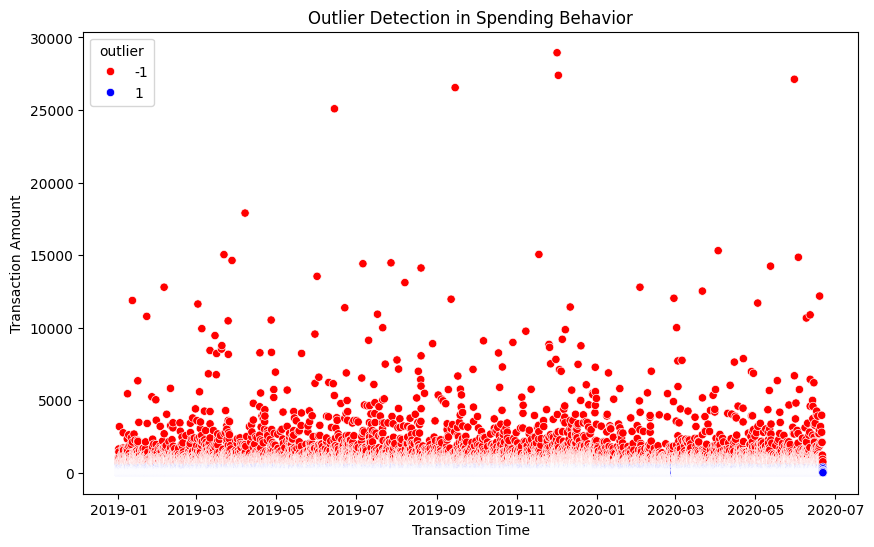

In [28]:

# Initializing and fitting the model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['outlier'] = iso_forest.fit_predict(df[['amt']])

# Visualizing outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trans_date_trans_time', y='amt', hue='outlier', palette={1: 'blue', -1: 'red'})
plt.title('Outlier Detection in Spending Behavior',)
plt.xlabel('Transaction Time')
plt.ylabel('Transaction Amount')
plt.savefig("Outlier Detection in Spending Behavior", dpi=300, bbox_inches="tight")
plt.show()


___
### Normal Spending Range:
Most transactions fall under $2,000, indicating typical customer spending behavior.

### Detected Anomalies:
Red points highlight unusual transactions, with some surpassing $25,000, possibly signaling high-value purchases or fraud.

### Temporal Outlier Patterns:
Outliers are scattered throughout the year, showing irregular spikes rather than seasonal trends.

___
## **3. Clustering Customers Based on Spending habits Using K-Means**

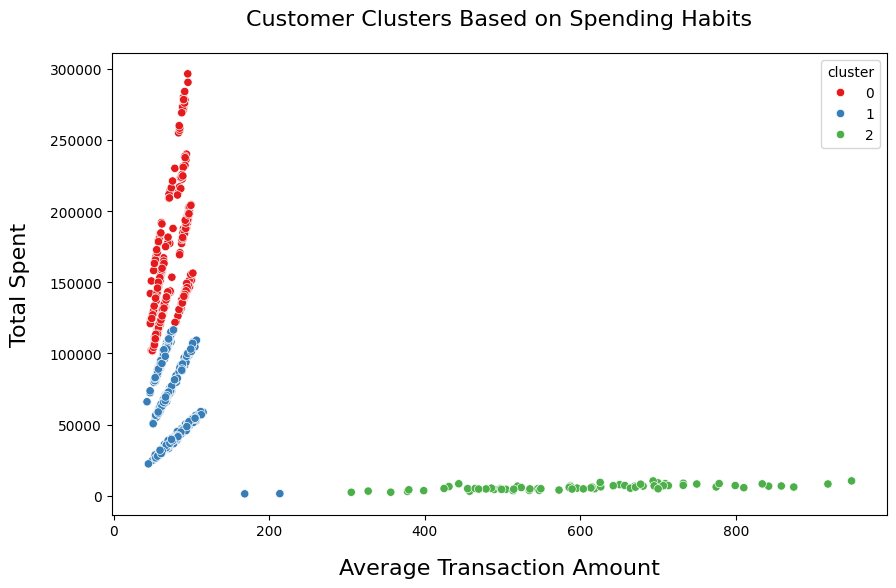

In [29]:


# Features for clustering
features = df.groupby('cc_num').agg({'amt': ['sum', 'mean', 'count']})
features.columns = ['total_spent', 'avg_transaction', 'transaction_count']

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
features['cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='avg_transaction', y='total_spent', hue='cluster', palette='Set1')
plt.title('Customer Clusters Based on Spending Habits',pad=20,size=16)
plt.xlabel('Average Transaction Amount',labelpad=14,fontdict={'size': 16})
plt.ylabel('Total Spent',labelpad=14,fontdict={'size': 16})
plt.savefig("Customer Clusters Based on Spending Habits", dpi=300, bbox_inches="tight")
plt.show()


## INSIGHTS
- Three Distinct Clusters:

Cluster 0 (Red): High total spenders with low average transaction amounts, suggesting frequent, smaller purchases.

Cluster 1 (Blue): Moderate total spenders with mid-range
transaction amounts, indicating balanced spending behavior.

Cluster 2 (Green): Low total spenders but with high average transaction amounts, pointing to infrequent but large transactions.

- Spending Patterns: Clusters 0 and 1 show a strong positive correlation between total spent and average transaction amount, while Cluster 2 remains flat, indicating a different spending behavior pattern.

- Outlier Detection: Some points in Cluster 1 show unusually low total spending despite high transaction amounts, possibly indicating one-off large purchases or errors.

---

---
___

# Machine Learning Model – Facebook Prophet

## Model Selection:
We will use Facebook Prophet, a powerful time-series forecasting tool designed for financial
and business data. It is robust to missing data and seasonal variations.
___
___

## Steps to Build the Model:
### 1. Preparing Data

   > Converting Transaction_Date to Time-Series Format

- Ensure the trans_date_trans_time column in your dataset is converted to a datetime format.

- Setting this column as the index for time-series operations.

 > Aggregating Transactions by Day/Month
- Group the dataset by day or month based on forecasting needs.
- Sum the Transaction_Amount for each period.
- Further break down the data by category to capture specific spending patterns

In [30]:
 # Handling outliers and skewness before applying time-series forecasting.
from scipy.stats import skew
#Calculate skewness before transformation:
original_skewness = skew(df["amt"])
print("Skewness before log transformation:", original_skewness)

# Calculate IQR (Interquartile Range)
Q1 = df["amt"].quantile(0.25)
Q3 = df["amt"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  Cap Outliers (Winsorization) - Uncomment if you prefer capping
df["amt"] = np.where(df["amt"] < lower_bound, lower_bound, df["amt"])
df["amt"] = np.where(df["amt"] > upper_bound, upper_bound, df["amt"])

# Recalculate skewness after handling outliers
cleaned_skewness = skew(df["amt"])
print("Skewness after handling outliers:", cleaned_skewness)

#Apply log transformation permanently:
df["amt"] = np.log1p(df["amt"])  # log(amt + 1) to handle zero values

#Calculate skewness after transformation:
transformed_skewness = skew(df["amt"])
print("Skewness after log transformation:", transformed_skewness)

Skewness before log transformation: 42.2778248827837
Skewness after handling outliers: 1.0619621755092699
Skewness after log transformation: -0.5351445480954713


In [31]:
# Aggregate transactions category-wise by day, assuming the correct column name is 'trans_date_trans_time'
df_prophet = df.groupby(df['trans_date_trans_time'].dt.date)['amt'].sum().reset_index()

# Rename columns for Prophet
df_prophet.columns = ["ds", "y"]  # 'ds' = date, 'y' = target variable

df_prophet.head()

,ds,y
0,2019-01-01,8331.115095
1,2019-01-02,3884.604087
2,2019-01-03,4359.996276
3,2019-01-04,5251.381450
4,2019-01-05,4968.719704


___
## Step 2: Train Model


>  Defining Target Variable

- Setting Transaction_Amount as the target (y) for the Prophet model.
- Ensuring the ds column contains time-series data.


>  Adding External Regressors

- Incorporate external factors like holidays or economic indicators (e.g., Inflation Rate, Interest Rate).
- Using Prophet’s built-in functionality for holidays or manually add economic variables.

In [32]:
# Initialize the model
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.add_seasonality(name="monthly", period=30.5, fourier_order=5)  # Add monthly seasonality

# Fit the model
model.fit(df_prophet)

# Create a future dataframe (e.g., forecast next 30 days)
future = model.make_future_dataframe(periods=30,freq="D")

# Make predictions
forecast = model.predict(future)

# Display predictions
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb69xyifs/43n0v0c9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb69xyifs/pw8a62rq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19564', 'data', 'file=/tmp/tmpb69xyifs/43n0v0c9.json', 'init=/tmp/tmpb69xyifs/pw8a62rq.json', 'output', 'file=/tmp/tmpb69xyifs/prophet_modelfsb4kfds/prophet_model-20250224093645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:36:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:36:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
562,2020-07-17,8764.248846,6768.268911,10646.150218
563,2020-07-18,10778.097776,8832.047132,12737.765800
564,2020-07-19,12574.197241,10478.650425,14646.287978
565,2020-07-20,12768.443110,10654.776068,14844.272809
566,2020-07-21,8425.558932,6292.643504,10407.543503


In [33]:
import pickle  # Add this line to import the pickle module

# Save the trained model
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Evaluatimg Model Performance

○ Usign metrics like MAE (Mean Absolute Error) and RMSE (Root Mean Square
Error).

○ Comparing Prophet’s forecast with actual data.

<Figure size 1400x800 with 0 Axes>

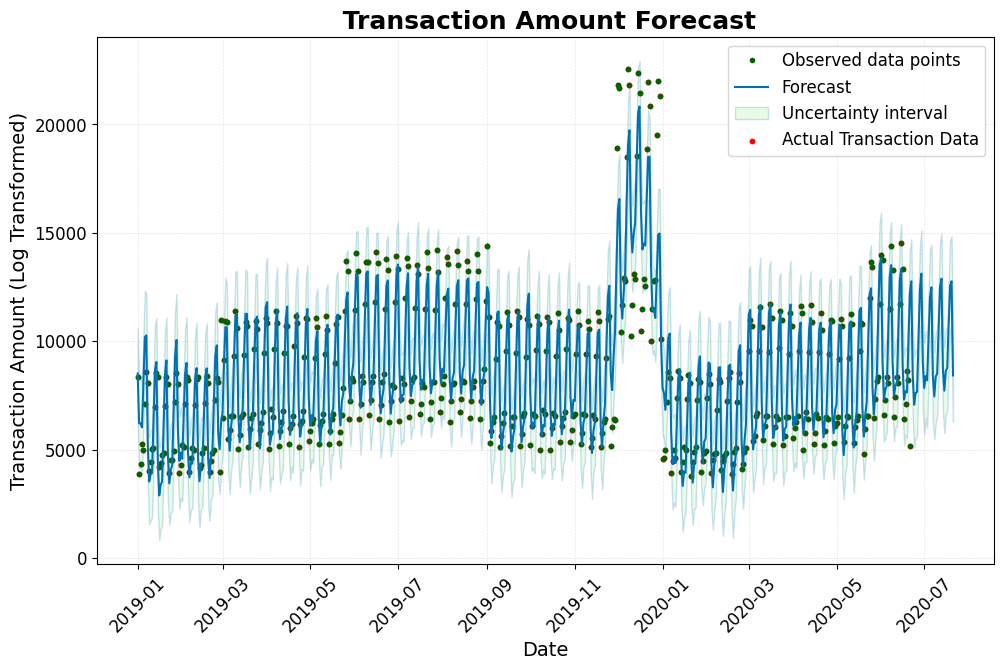

In [34]:
# Enhanced Plot for Clearer Visualization
fig = plt.figure(figsize=(14, 8))  # Bigger plot for better clarity

# Plot forecast with custom colors and grid
fig = model.plot(forecast)
plt.title(" Transaction Amount Forecast", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Transaction Amount (Log Transformed)", fontsize=14)

# Customizing forecast line and uncertainty interval colors
plt.gca().lines[0].set_color('darkgreen')  # Forecast line in dark green
plt.gca().collections[0].set_facecolor('lightgreen')  # Confidence interval in light green

# Plot actual transaction data points
plt.scatter(df_prophet['ds'], df_prophet['y'], color='red', s=10, label="Actual Transaction Data")

# Adding gridlines for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Adding legend
plt.legend(fontsize=12)

# Improving tick labels
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Save the enhanced figure
plt.savefig("enhanced_transaction_forecast.png", dpi=300, bbox_inches="tight")

# Show the enhanced plot
plt.show()


1. **Seasonal Patterns & Trends:** Clear cyclical fluctuations with peaks and troughs reflect consistent monthly or weekly spending patterns. A noticeable upward trend appears in early 2019, followed by increased activity toward late 2019.  

2. **Significant Spike in Late 2019:** A sharp rise around **November 2019** peaks over **22,000** (log-transformed units), likely due to seasonal events like **Black Friday** or holiday shopping, with increased volatility.  

3. **Forecast Accuracy & Uncertainty:** The model closely tracks actual transactions, showing tight uncertainty intervals during stable periods and widening during high-volatility months, indicating reliable overall predictive performance.  

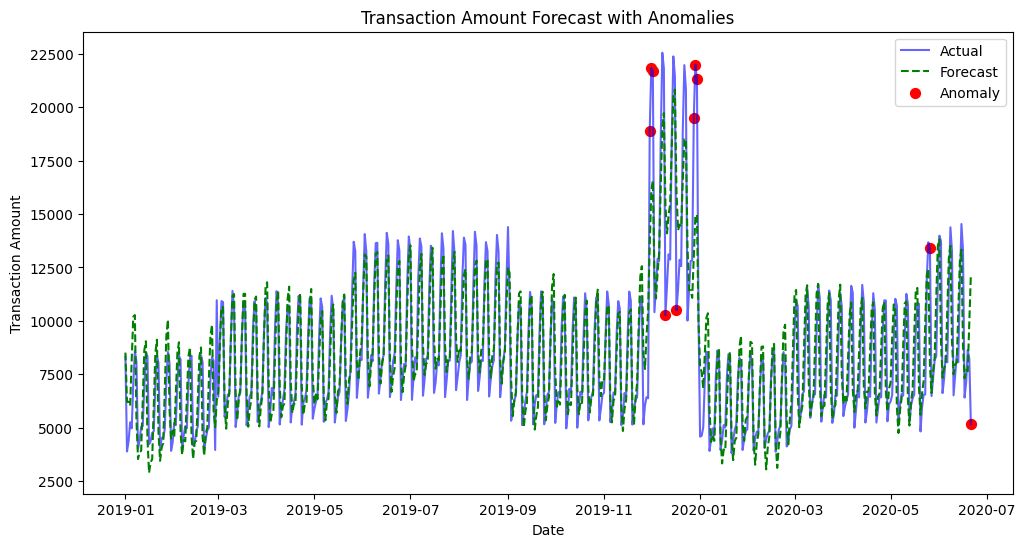

In [35]:
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])
forecast["ds"] = pd.to_datetime(forecast["ds"])

df_prophet = df_prophet.merge(forecast[["ds", "yhat"]], on="ds", how="left")

df_prophet["residual"] = df_prophet["y"] - df_prophet["yhat"]

threshold = 3 * np.std(df_prophet["residual"])
df_prophet["anomaly"] = np.abs(df_prophet["residual"]) > threshold  # Mark anomalies

plt.figure(figsize=(12, 6))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Actual", color="blue", alpha=0.6)
plt.plot(df_prophet["ds"], df_prophet["yhat"], label="Forecast", color="green", linestyle="dashed")

anomalies = df_prophet[df_prophet["anomaly"]]
plt.scatter(anomalies["ds"], anomalies["y"], color="red", label="Anomaly", marker="o", s=50)

plt.xlabel("Date")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount Forecast with Anomalies")
plt.legend()

plt.savefig("forecast_anomalies.png", dpi=300, bbox_inches="tight")
plt.show()

- The model effectively detects outliers in transaction amounts (red dots).

- These anomalies could indicate fraudulent activity or unusual spending behavior

---


## **Evaluating Model Performance**

○ Use metrics like MAE (Mean Absolute Error) and RMSE (Root Mean Square
Error).

○ Compare Prophet’s forecast with actual data.

In [36]:
#  Mean Absolute Error (MAE)
mae = mean_absolute_error(df_prophet["y"], df_prophet["yhat"])
print("Mean Absolute Error (MAE):", mae)

#  Mean Squared Error (MSE)
mse = mean_squared_error(df_prophet["y"], df_prophet["yhat"])
print("Mean Squared Error (MSE):", mse)

#  Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

#  R-squared (R²)
r2 = r2_score(df_prophet["y"], df_prophet["yhat"])
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1101.303962880213
Mean Squared Error (MSE): 2575509.4104066663
Root Mean Squared Error (RMSE): 1604.8393721512027
R-squared (R²): 0.7825450417963025


In [37]:
!pip install streamlit prophet mlxtend seaborn matplotlib scikit-learn


---

In [39]:
from google.colab import files
files.download('prophet_model.pkl')  # Download the saved model


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>